In [1]:
pip install sklearn-pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
import warnings
from sklearn import pipeline,preprocessing,metrics,model_selection,ensemble
from sklearn_pandas import DataFrameMapper

C:\Users\Aviral Trivedi\AppData\Local\Temp\ipykernel_5748\4121594492.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:
df = pd.read_csv('dataset.csv')

In [4]:
df

,Humidity,Temperature
0,0.596606,13.182462
1,0.656572,8.156680
2,0.141856,32.713142
3,0.757360,6.282035
4,0.613228,12.675158
...,...,...
295,0.615160,3.892790
296,0.524208,15.616094
297,0.647608,4.596190
298,0.410353,18.160583


In [6]:
df.apply(pd.isnull).sum()/df.shape[0]

Humidity       0.0
Temperature    0.0
dtype: float64

In [7]:
df[pd.isnull(df["Humidity"])]

,Humidity,Temperature


In [8]:
df[pd.isnull(df["Temperature"])]

,Humidity,Temperature


In [9]:
df.dtypes

Humidity       float64
Temperature    float64
dtype: object

In [10]:
df.index

RangeIndex(start=0, stop=300, step=1)

<AxesSubplot:>

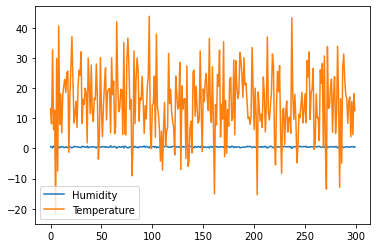

In [11]:
df.plot()

<AxesSubplot:>

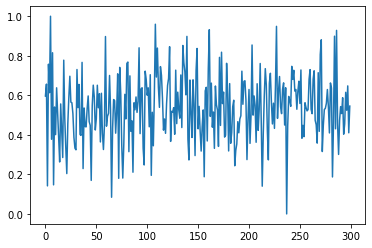

In [50]:
df['Humidity'].plot()

<AxesSubplot:>

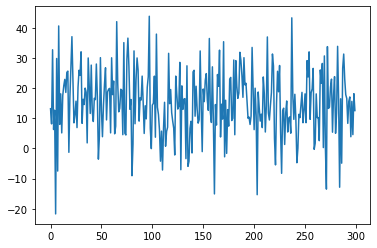

In [51]:
df['Temperature'].plot()

In [25]:
X = df[['Humidity']]
Y = df[['Temperature']]
predictions = []

In [26]:
X

,Humidity
0,0.596606
1,0.656572
2,0.141856
3,0.757360
4,0.613228
...,...
295,0.615160
296,0.524208
297,0.647608
298,0.410353


In [27]:
Y

,Temperature
0,13.182462
1,8.156680
2,32.713142
3,6.282035
4,12.675158
...,...
295,3.892790
296,15.616094
297,4.596190
298,18.160583


In [53]:
df["target"] = df.shift(-1)["Temperature"]


In [54]:
df

,Humidity,Temperature,target
0,0.596606,13.182462,8.156680
1,0.656572,8.156680,32.713142
2,0.141856,32.713142,6.282035
3,0.757360,6.282035,12.675158
4,0.613228,12.675158,-21.684834
...,...,...,...
295,0.615160,3.892790,15.616094
296,0.524208,15.616094,4.596190
297,0.647608,4.596190,18.160583
298,0.410353,18.160583,12.561416


In [55]:
df = df.iloc[:-1,:].copy()

In [56]:
df

,Humidity,Temperature,target
0,0.596606,13.182462,8.156680
1,0.656572,8.156680,32.713142
2,0.141856,32.713142,6.282035
3,0.757360,6.282035,12.675158
4,0.613228,12.675158,-21.684834
...,...,...,...
294,0.455106,17.081201,3.892790
295,0.615160,3.892790,15.616094
296,0.524208,15.616094,4.596190
297,0.647608,4.596190,18.160583


In [90]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [104]:
predictors = ["Humidity","Temperature"]

In [153]:
X_train, X_test, Y_train, Y_test =   train_test_split(X,Y,test_size=(0.2))

In [101]:
print(X.shape,X_train.shape,X_test.shape)

(300, 1) (240, 1) (60, 1)


In [88]:
X_train

,Humidity
204,0.499783
166,0.331737
48,0.591784
115,0.583849
50,0.481982
...,...
114,0.701223
224,0.560182
243,0.680544
203,0.854545


In [76]:
X_test

,Humidity
207,0.362435
98,0.722307
43,0.466662
116,0.423821
56,0.407817
55,0.610350
46,0.548197
284,0.899063
180,0.318575
96,0.332881


In [155]:
Y_train

,Temperature
259,-0.285396
299,12.561416
256,18.494122
189,16.960268
276,22.982466
...,...
31,8.336502
49,30.105127
9,7.978809
244,11.334751


In [156]:
Y_test

,Temperature
12,17.560260
248,8.530652
105,13.654579
94,9.811449
196,7.962967
44,16.186075
15,18.576819
293,15.652918
136,-4.253388
42,8.940113


In [109]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [110]:
predictions = reg.predict(test[predictors])


In [111]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

124.20546741376275

In [112]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [113]:
combined

,actual,predictions
60,17.841364,14.474743
61,22.350748,15.098203
62,4.860899,14.810828
63,7.374370,15.498873
64,42.032028,15.657084
...,...,...
294,3.892790,15.208209
295,15.616094,15.700301
296,4.596190,15.175430
297,18.160583,15.604223


<AxesSubplot:>

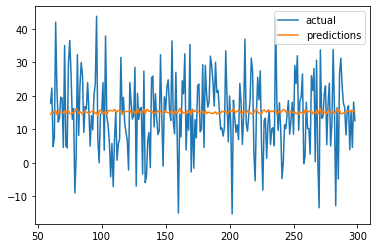

In [114]:
combined.plot()

In [115]:
reg.coef_

array([-1.70389655, -0.05799082])

In [117]:
df["Humidity"] = df["Temperature"].rolling(30).mean()


In [123]:
def create_predictions(predictors,df, reg):   
    X_train, X_test, Y_train, Y_test =   train_test_split(X,Y,test_size=(0.2))
    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])
    error = mean_squared_error(test["target"], predictions)
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [126]:
predictors = ["Humidity","Temperature"]

error, combined = create_predictions(predictors,df, reg)
error

124.20546741376275

<AxesSubplot:>

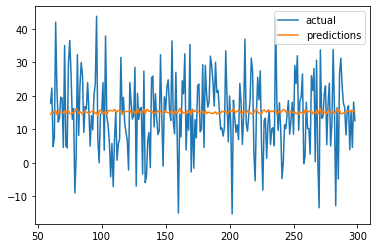

In [127]:
combined.plot()

In [148]:
df["hum_avg"] = df["Humidity"].groupby(df.index).apply(lambda x: x.expanding(1).mean())


In [147]:
error, combined = create_predictions(predictors + ["Humidity"],df, reg)
error

124.20805931662714

In [149]:
reg.coef_

array([-0.87963433, -0.05875732, -0.87963433])

In [150]:
df.corr()["target"]

Humidity       0.029957
Temperature   -0.007477
target         1.000000
temp_avg      -0.007477
hum_avg        0.029957
Name: target, dtype: float64

In [151]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [152]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
202,-15.317362,15.499320,30.816682
160,-15.057108,15.222413,30.279521
270,-13.464646,15.569041,29.033687
96,43.825049,15.031753,28.793296
283,-12.841384,15.272531,28.113915
236,43.298697,15.594606,27.704091
64,42.032028,15.663529,26.368499
79,-9.033500,15.216331,24.249831
226,-8.234516,15.554826,23.789342
109,-7.144993,15.459857,22.604850
